<a href="https://colab.research.google.com/github/jbsher/p4_waste_classification/blob/master/2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4 - Waste Classification**
Team 3: Brody Sherwood, Woojong Choi

## **Imports**

#### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, recall_score, f1_score

#### Data

In [ ]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Loading data

In [ ]:
# Reading data

train_data_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/train_data.npy'
train_labels_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/train_labels.npy'
test_data_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/test_data.npy'
test_labels_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/test_labels.npy'

train_data = np.load(train_data_path)
train_labels = np.load(train_labels_path)
test_data = np.load(test_data_path)
test_labels = np.load(test_labels_path)

### **Data Preprocessing**

In [ ]:
# shape before train_val split

train_data.shape, train_labels.shape

((22564, 128, 128, 3), (22564,))

In [ ]:
# normalize data

train_data = train_data / 255
test_data_norm = test_data / 255

In [ ]:
# train, validation split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.20, random_state=42, stratify=train_labels)

In [ ]:
# shape after train, validation split

X_train.shape, y_train.shape

((18051, 128, 128, 3), (18051,))

In [ ]:
# shape after train, validation split

X_val.shape, y_val.shape

((4513, 128, 128, 3), (4513,))

In [ ]:
# saving X_train, X_val, y_train, y_val
# train_test_split' caused Colab to crash due to insufficient memory. Saving the files for future use.

save_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays'

np.save(os.path.join(save_path, 'X_train.npy'), X_train)
np.save(os.path.join(save_path, 'X_val.npy'), X_val)
np.save(os.path.join(save_path, 'y_train.npy'), y_train)
np.save(os.path.join(save_path, 'y_val.npy'), y_val)
np.save(os.path.join(save_path, 'test_data_norm.npy'), test_data_norm)

In [ ]:
# Reading data

X_train_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/X_train.npy'
X_val_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/X_val.npy'
y_train_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/y_train.npy'
y_val_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/y_val.npy'

X_train = np.load(X_train_path)
X_val = np.load(X_val_path)
y_train = np.load(y_train_path)
y_val = np.load(y_val_path)

test_data_norm_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/test_data_norm.npy'
test_data_norm = np.load(test_data_norm_path)

### **Modeling**

#### **Baseline accuracy**

In [ ]:
labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

print(f'Organic: {round(counts[0]/len(y_train) * 100, 2)}%')
print(f'Recyclable: {round(counts[1]/len(y_train) * 100, 2)}%')

0: 10052
1: 7999
Organic: 55.69%
Recyclable: 44.31%


---
#### **Model 1**
 - 2 Convolutional layers
 - 1 Dense layer

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model1.add(MaxPooling2D(2))

model1.add(Conv2D(64, 3, activation='relu'))
model1.add(MaxPooling2D(2))

model1.add(Flatten())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history1 = model1.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 10,
                      batch_size = 512)

Epoch 1/10
36/36 [==============================] - 17s 293ms/step - loss: 0.6837 - acc: 0.5684 - val_loss: 0.6663 - val_acc: 0.5568
Epoch 2/10
36/36 [==============================] - 6s 180ms/step - loss: 0.6495 - acc: 0.6297 - val_loss: 0.6164 - val_acc: 0.6918
Epoch 3/10
36/36 [==============================] - 6s 180ms/step - loss: 0.6073 - acc: 0.6754 - val_loss: 0.5755 - val_acc: 0.7040
Epoch 4/10
36/36 [==============================] - 6s 181ms/step - loss: 0.5944 - acc: 0.6850 - val_loss: 0.5511 - val_acc: 0.7232
Epoch 5/10
36/36 [==============================] - 7s 182ms/step - loss: 0.5807 - acc: 0.6952 - val_loss: 0.5407 - val_acc: 0.7294
Epoch 6/10
36/36 [==============================] - 7s 182ms/step - loss: 0.5717 - acc: 0.7014 - val_loss: 0.5397 - val_acc: 0.7288
Epoch 7/10
36/36 [==============================] - 7s 184ms/step - loss: 0.5618 - acc: 0.7133 - val_loss: 0.5535 - val_acc: 0.7204
Epoch 8/10
36/36 [==============================] - 7s 184ms/step - loss: 0

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

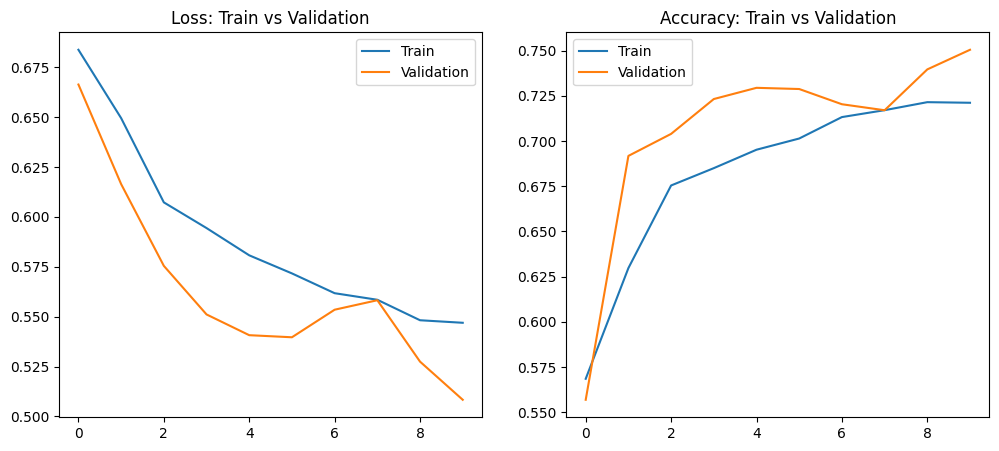

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history1.history['loss'], label='Train')
ax1.plot(history1.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history1.history['acc'], label='Train')
ax2.plot(history1.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model1_loss_accuracy.jpg');

In [ ]:
history1.history['acc'][-1], history1.history['val_acc'][-1]

(0.7211788892745972, 0.7504985332489014)

The first model outperformed the baseline significantly. There's a minor sign of underfitting. There is room for improvement in the model's performance.

---
#### **Model 2**
- 3 Convolutional layers
- 1 Dense layer

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(128, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Flatten())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history2 = model2.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 20,
                      batch_size = 512)

Epoch 1/20
36/36 [==============================] - 13s 297ms/step - loss: 0.6882 - acc: 0.5556 - val_loss: 0.6865 - val_acc: 0.5568
Epoch 2/20
36/36 [==============================] - 8s 228ms/step - loss: 0.6869 - acc: 0.5569 - val_loss: 0.6866 - val_acc: 0.5568
Epoch 3/20
36/36 [==============================] - 8s 228ms/step - loss: 0.6792 - acc: 0.5637 - val_loss: 0.6498 - val_acc: 0.5641
Epoch 4/20
36/36 [==============================] - 8s 228ms/step - loss: 0.6477 - acc: 0.6282 - val_loss: 0.6009 - val_acc: 0.7075
Epoch 5/20
36/36 [==============================] - 8s 226ms/step - loss: 0.6171 - acc: 0.6667 - val_loss: 0.5830 - val_acc: 0.7031
Epoch 6/20
36/36 [==============================] - 8s 224ms/step - loss: 0.6034 - acc: 0.6792 - val_loss: 0.5618 - val_acc: 0.7210
Epoch 7/20
36/36 [==============================] - 8s 223ms/step - loss: 0.5834 - acc: 0.6979 - val_loss: 0.5748 - val_acc: 0.7055
Epoch 8/20
36/36 [==============================] - 8s 222ms/step - loss: 0

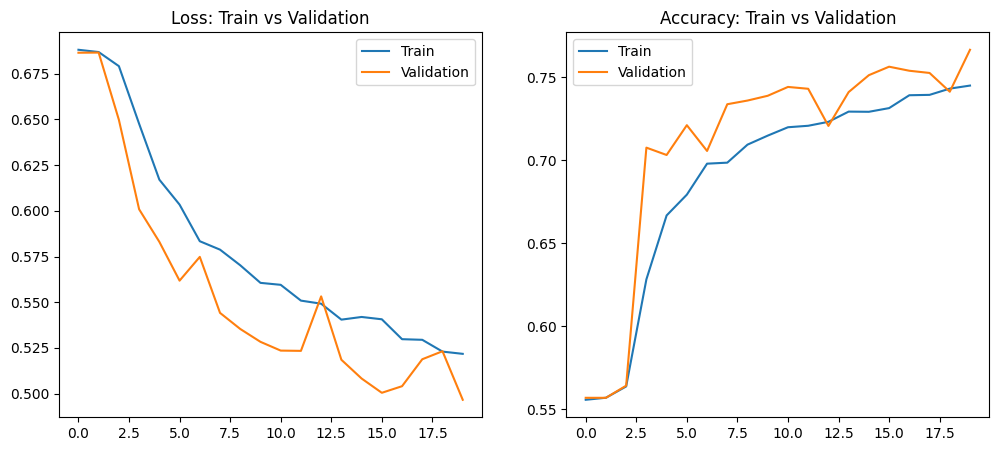

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history2.history['loss'], label='Train')
ax1.plot(history2.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history2.history['acc'], label='Train')
ax2.plot(history2.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model2_loss_accuracy.jpg');

In [ ]:
history2.history['acc'][-1], history2.history['val_acc'][-1]

(0.744889497756958, 0.7664524912834167)

Adding an additional convolutional layer did not substantially enhance the model's performance, and underfitting persists.

---
#### **Model 3**
- 4 Convolutional layers
- 2 Dense layers

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model3.add(MaxPooling2D(2))

model3.add(Conv2D(64, 3, activation='relu'))
model3.add(MaxPooling2D(2))

model3.add(Conv2D(128, 3, activation='relu'))
model3.add(MaxPooling2D(2))

model3.add(Conv2D(256, 3, activation='relu'))
model3.add(MaxPooling2D(2))

model3.add(Flatten())

model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history3 = model3.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 20,
                      batch_size = 512)

Epoch 1/20
36/36 [==============================] - 22s 380ms/step - loss: 0.6010 - acc: 0.6731 - val_loss: 0.4969 - val_acc: 0.7919
Epoch 2/20
36/36 [==============================] - 9s 239ms/step - loss: 0.4370 - acc: 0.8068 - val_loss: 0.4276 - val_acc: 0.8176
Epoch 3/20
36/36 [==============================] - 9s 239ms/step - loss: 0.4018 - acc: 0.8258 - val_loss: 0.4112 - val_acc: 0.8230
Epoch 4/20
36/36 [==============================] - 9s 238ms/step - loss: 0.3800 - acc: 0.8382 - val_loss: 0.3781 - val_acc: 0.8411
Epoch 5/20
36/36 [==============================] - 9s 238ms/step - loss: 0.3742 - acc: 0.8397 - val_loss: 0.3771 - val_acc: 0.8351
Epoch 6/20
36/36 [==============================] - 8s 236ms/step - loss: 0.3532 - acc: 0.8514 - val_loss: 0.3628 - val_acc: 0.8524
Epoch 7/20
36/36 [==============================] - 8s 236ms/step - loss: 0.3312 - acc: 0.8631 - val_loss: 0.4507 - val_acc: 0.8145
Epoch 8/20
36/36 [==============================] - 9s 237ms/step - loss: 0

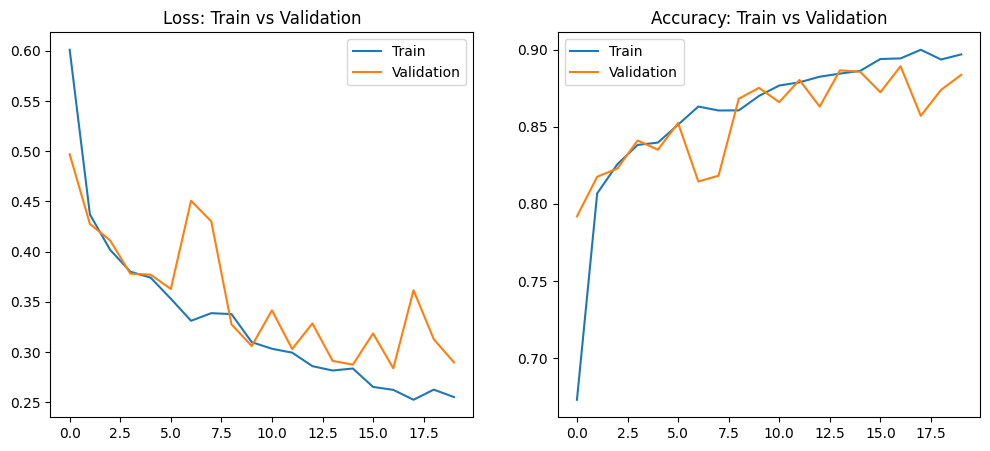

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history3.history['loss'], label='Train')
ax1.plot(history3.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history3.history['acc'], label='Train')
ax2.plot(history3.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model3_loss_accuracy.jpg');

In [ ]:
history3.history['acc'][-1], history3.history['val_acc'][-1]

(0.8969032168388367, 0.883669376373291)

In [ ]:
# saving model

model3.save('/content/drive/MyDrive/general_assembly/group_project/models/model3.h5')

Performance increased significnatly for the third iteration. There is little sign of under/overfitting.

---
#### **Model 4**
- Same as Model 3, but changed:
  - number of neurons to 32 from 10
  - epochs to 30 from 20

In [ ]:
model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model4.add(MaxPooling2D(2))

model4.add(Conv2D(64, 3, activation='relu'))
model4.add(MaxPooling2D(2))

model4.add(Conv2D(128, 3, activation='relu'))
model4.add(MaxPooling2D(2))

model4.add(Conv2D(256, 3, activation='relu'))
model4.add(MaxPooling2D(2))

model4.add(Flatten())

model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history4 = model4.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 30,
                      batch_size = 512)

Epoch 1/30
36/36 [==============================] - 22s 361ms/step - loss: 0.6729 - acc: 0.5722 - val_loss: 0.6451 - val_acc: 0.7177
Epoch 2/30
36/36 [==============================] - 8s 230ms/step - loss: 0.5838 - acc: 0.7223 - val_loss: 0.5144 - val_acc: 0.7565
Epoch 3/30
36/36 [==============================] - 8s 230ms/step - loss: 0.5168 - acc: 0.7477 - val_loss: 0.4815 - val_acc: 0.7662
Epoch 4/30
36/36 [==============================] - 8s 231ms/step - loss: 0.4809 - acc: 0.7725 - val_loss: 0.4954 - val_acc: 0.7636
Epoch 5/30
36/36 [==============================] - 8s 233ms/step - loss: 0.4907 - acc: 0.7669 - val_loss: 0.4807 - val_acc: 0.7667
Epoch 6/30
36/36 [==============================] - 8s 233ms/step - loss: 0.4674 - acc: 0.7784 - val_loss: 0.4853 - val_acc: 0.7682
Epoch 7/30
36/36 [==============================] - 8s 236ms/step - loss: 0.4645 - acc: 0.7826 - val_loss: 0.4352 - val_acc: 0.7986
Epoch 8/30
36/36 [==============================] - 9s 237ms/step - loss: 0

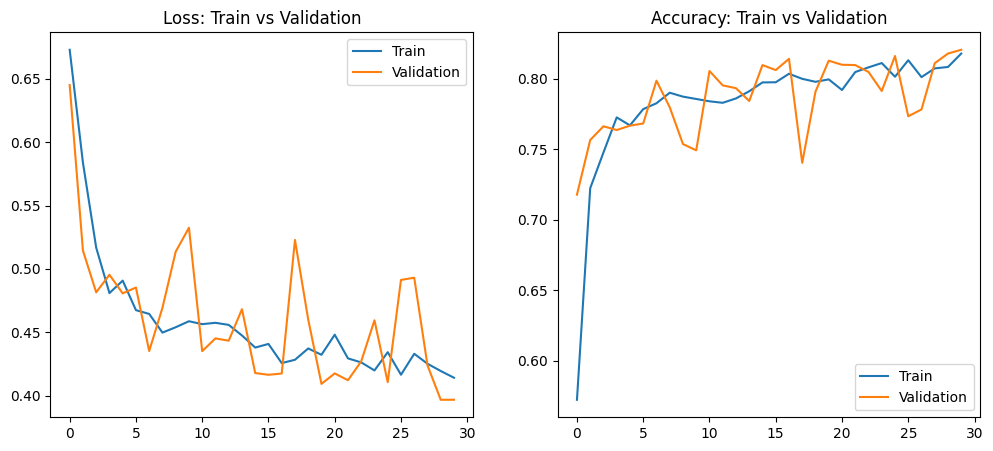

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history4.history['loss'], label='Train')
ax1.plot(history4.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history4.history['acc'], label='Train')
ax2.plot(history4.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model4_loss_accuracy.jpg');

In [ ]:
history4.history['acc'][-1], history4.history['val_acc'][-1]

(0.8178493976593018, 0.8205184936523438)

Changing the Dense layer to 32 and increasing the epochs to 30 improved the model performance slightly.

---
#### **Model 5: VGG-16**


Reference: https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/#h-examples-of-pre-trained-models-for-image-classification

##### **VGG-16 Model 1**
 - VGG16
 - Data augmentation
 - 2 Dense layers
 - Drop out

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=45,       # Rotate the image by up to 40 degrees
    width_shift_range=0.15,  # Shift the image horizontally by up to 15% of the width
    height_shift_range=0.15, # Shift the image vertically by up to 15% of the height
    shear_range=0.1,         # Shear transformation (shear angle of 10 degrees.)
    zoom_range=0.2,          # Zoom in/out by up to 20%
    horizontal_flip=True,    # Allow random horizontal flip
    fill_mode='nearest'      # Fill in any pixels that might be lost during transformation
)

batch_size = 64

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=batch_size)

In [ ]:
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model5 = Sequential()
model5.add(base_model)
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['acc'])

history5 = model5.fit(train_generator,
                      steps_per_epoch=len(X_train) // batch_size, # floor division to make sure result is integer
                      epochs=10,
                      validation_data=val_generator,
                      validation_steps=len(X_val) // batch_size) # floor division to make sure result is integer

Epoch 1/10
282/282 [==============================] - 81s 268ms/step - loss: 0.6023 - acc: 0.6952 - val_loss: 0.4715 - val_acc: 0.8054
Epoch 2/10
282/282 [==============================] - 75s 266ms/step - loss: 0.4387 - acc: 0.8103 - val_loss: 0.3601 - val_acc: 0.8549
Epoch 3/10
282/282 [==============================] - 76s 267ms/step - loss: 0.4158 - acc: 0.8195 - val_loss: 0.3747 - val_acc: 0.8444
Epoch 4/10
282/282 [==============================] - 76s 270ms/step - loss: 0.3620 - acc: 0.8509 - val_loss: 0.3221 - val_acc: 0.8732
Epoch 5/10
282/282 [==============================] - 76s 270ms/step - loss: 0.3456 - acc: 0.8613 - val_loss: 0.3145 - val_acc: 0.8817
Epoch 6/10
282/282 [==============================] - 76s 269ms/step - loss: 0.3387 - acc: 0.8616 - val_loss: 0.3006 - val_acc: 0.8768
Epoch 7/10
282/282 [==============================] - 76s 270ms/step - loss: 0.3256 - acc: 0.8690 - val_loss: 0.3048 - val_acc: 0.8853
Epoch 8/10
282/282 [==============================] - 7

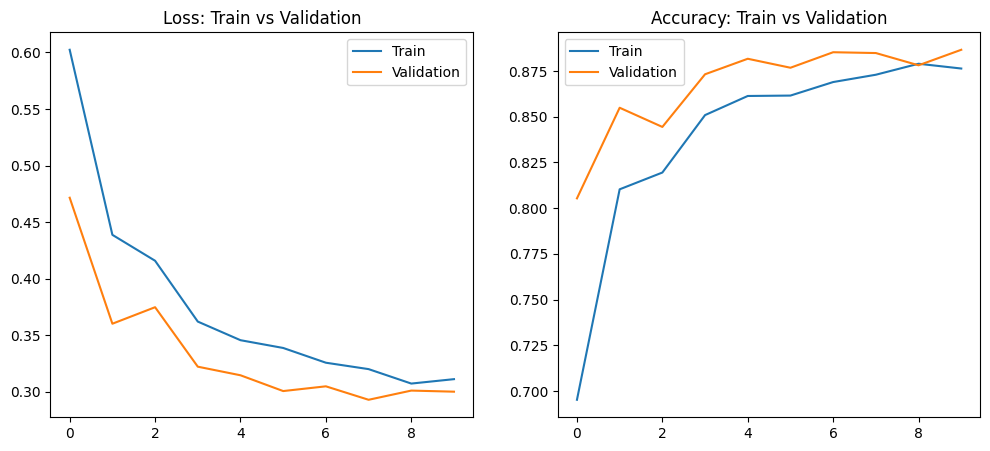

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history5.history['loss'], label='Train')
ax1.plot(history5.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history5.history['acc'], label='Train')
ax2.plot(history5.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model5_loss_accuracy.jpg');

In [ ]:
history5.history['acc'][-1], history5.history['val_acc'][-1]

(0.8763551712036133, 0.8866071701049805)

Using the pre-trained model VGG-16 and 2 dense layers with drop out improved the model performance significantly. Train and validation accuracy scores are similar, no sign of under/overfitting.

##### **VGG-16 Model 2**
 - VGG16
 - Data augmentation
 - 4 Dense layers
 - Drop out
 - Early stopping

In [ ]:
# Running model with more dense layers + Early stopping

base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model5 = Sequential()
model5.add(base_model)
model5.add(Flatten())

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=5)

history5 = model5.fit(train_generator,
                      steps_per_epoch=len(X_train) // batch_size, # floor division to make sure result is integer
                      epochs=20,
                      validation_data=val_generator,
                      validation_steps=len(X_val) // batch_size,
                      callbacks = [es]) # floor division to make sure result is integer

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
282/282 [==============================] - 96s 278ms/step - loss: 0.5180 - acc: 0.7818 - val_loss: 1.2643 - val_acc: 0.5850
Epoch 2/20
282/282 [==============================] - 83s 293ms/step - loss: 0.3799 - acc: 0.8556 - val_loss: 0.8831 - val_acc: 0.7574
Epoch 3/20
282/282 [==============================] - 82s 292ms/step - loss: 0.3326 - acc: 0.8731 - val_loss: 0.3258 - val_acc: 0.8786
Epoch 4/20
282/282 [==============================] - 82s 291ms/step - loss: 0.3153 - acc: 0.8808 - val_loss: 0.2292 - val_acc: 0.9179
Epoch 5/20
282/282 [==============================] - 82s 291ms/step - loss: 0.2762 - acc: 0.8969 - val_loss: 0.2646 - val_acc: 0.9002
Epoch 6/20
282/282 [==============================] - 82s 291ms/step - loss: 0.2578 - acc: 0.9049 - val_loss: 0.4320 - val_acc: 0.8183
Epoch 7/20
282/282 [==============================] - 82s 291ms/step - loss: 0.2543 - acc: 0.9049 - val_loss: 0.2555 - val_ac

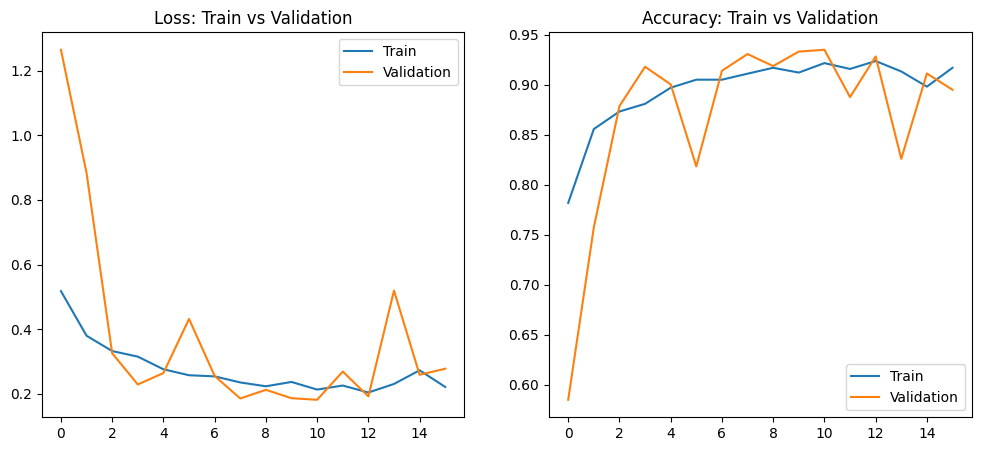

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history6.history['loss'], label='Train')
ax1.plot(history6.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history6.history['acc'], label='Train')
ax2.plot(history6.history['val_acc'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model6a_loss_accuracy.jpg');

In [ ]:
history5.history['acc'][-1], history5.history['val_acc'][-1]

(0.9168288111686707, 0.8948660492897034)

The performance of the updated VGG-16 model improved slightly after incorporating additional dense layers and implementing Early Stopping. While there is a slight indication of overfitting, it remains marginal.

In [ ]:
# saving model

model5.save('/content/drive/MyDrive/general_assembly/group_project/models/model5.h5')
#model5 = load_model('model5.h5')

---
#### **Model 6**
- Data augmentation
- 5 Convolutional layers
- 3 Dense layers
- Drop out
- Early stopping
- Reduce test size to 0.10

In [ ]:
# train, validation split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.10, random_state=42, stratify=train_labels)



In [ ]:
model = Sequential()

# Define the data augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# First convolutional layer
model.add(Conv2D(64, 3, activation='relu', input_shape=(128, 128, 3)))

# Second convolutional layer
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

# Third convolutional layer
model.add(Conv2D(128, 3, activation='relu'))
model.add(Dropout(0.15))
model.add(MaxPooling2D(2))

# Fourth convolutional layer
model.add(Conv2D(256, 3, activation='relu'))
model.add(Dropout(0.15))

# Fifth convolutional layer
model.add(Conv2D(128, 3, activation='relu'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping callback
es = EarlyStopping(monitor='val_loss', patience=10)


datagen.fit(X_train)

batch_size = 64

# Model training with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    verbose=1)


Epoch 1/50
317/317 [==============================] - 94s 228ms/step - loss: 0.9257 - accuracy: 0.7713 - val_loss: 0.5005 - val_accuracy: 0.8347
Epoch 2/50
317/317 [==============================] - 69s 218ms/step - loss: 0.4911 - accuracy: 0.8097 - val_loss: 0.4904 - val_accuracy: 0.8223
Epoch 3/50
317/317 [==============================] - 69s 218ms/step - loss: 0.4439 - accuracy: 0.8211 - val_loss: 0.3940 - val_accuracy: 0.8516
Epoch 4/50
317/317 [==============================] - 69s 218ms/step - loss: 0.4134 - accuracy: 0.8315 - val_loss: 0.3880 - val_accuracy: 0.8547
Epoch 5/50
317/317 [==============================] - 69s 218ms/step - loss: 0.3830 - accuracy: 0.8434 - val_loss: 0.3560 - val_accuracy: 0.8644
Epoch 6/50
317/317 [==============================] - 70s 220ms/step - loss: 0.3788 - accuracy: 0.8494 - val_loss: 0.3661 - val_accuracy: 0.8516
Epoch 7/50
317/317 [==============================] - 69s 218ms/step - loss: 0.3630 - accuracy: 0.8552 - val_loss: 0.3653 - val_ac

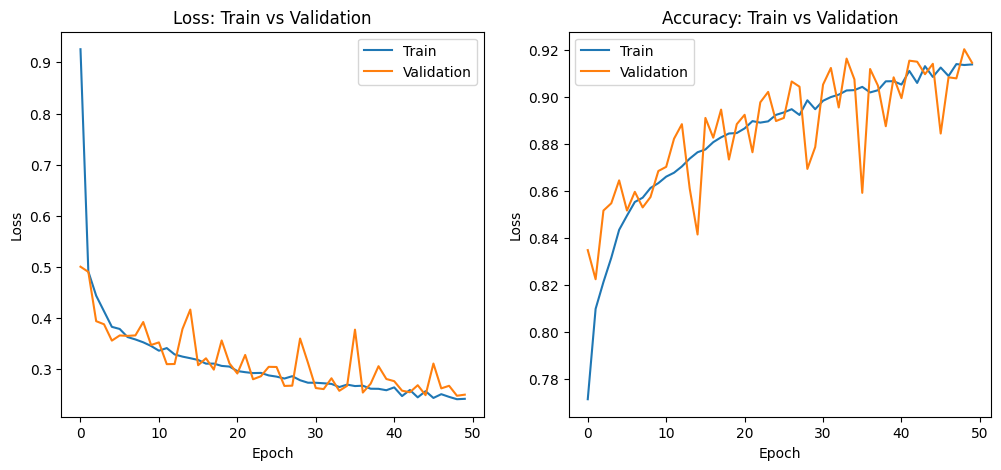

In [ ]:
# Plotting loss and accuracy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], label='Train')
ax2.plot(history.history['val_accuracy'], label='Validation')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model6_loss_accuracy.jpg');

The loss and accuracy scores are continuing to get better with more epochs. During the process of experimentation, we found that the scores plateaued and stayed oscillating around the 50 epoch mark.

In [ ]:
history.history['accuracy'][-1], history.history['val_accuracy'][-1]

(0.9137735962867737, 0.9144882559776306)

In [ ]:
# saving model

model.save('/content/drive/MyDrive/general_assembly/group_project/models/model6.h5')
#model6 = load_model('model6.h6')

### Evaluation (Model performance on test data)

In [ ]:
test_labels_path = '/content/drive/MyDrive/general_assembly/group_project/train_test_data_arrays/test_labels.npy'
test_labels = np.load(test_labels_path)

In [ ]:
test_data_norm.shape, test_labels.shape

((2513, 128, 128, 3), (2513,))

In [ ]:
# Loading model6 (best model)

model6_path = '/content/drive/MyDrive/general_assembly/group_project/models/model6.h'
model = load_model(model6_path)

In [ ]:
# Evaluating model6s performance on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


79/79 [==============================] - 1s 7ms/step - loss: 0.1838 - accuracy: 0.9407
Test Loss: 0.18380619585514069
Test Accuracy: 0.940708339214325


The best model trained on train data achieved an accuracy of 94.07% on the test dataset.

In [ ]:
# prediction

preds = model.predict(test_data)
preds

79/79 [==============================] - 1s 6ms/step


array([[3.6280127e-03],
       [5.7613822e-03],
       [2.8978955e-04],
       ...,
       [9.4534963e-01],
       [9.7223747e-01],
       [9.6834922e-01]], dtype=float32)

In [ ]:
y_score = preds.ravel()
y_preds = np.where(y_score > 0.5, 1, 0)

In [ ]:
# Predicted

labels, counts = np.unique(y_preds, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

0: 1434
1: 1079


In [ ]:
# Actual

labels, counts = np.unique(test_labels, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

0: 1401
1: 1112


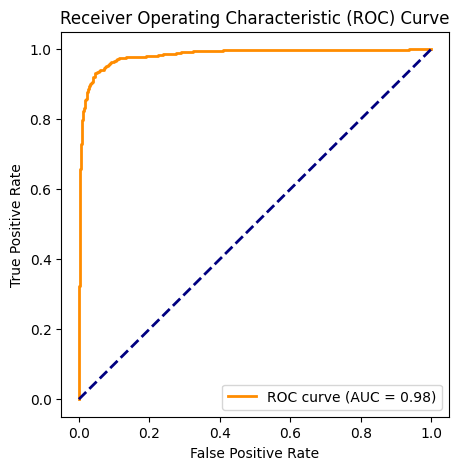

In [ ]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(test_labels, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/ROC_curve.jpg');
plt.show()

AUC score of 0.98 indicates that the model is performing very well in terms of distinguishing between 'organic' images and 'recyclable' images.

In [ ]:
# Precision, Recall, f1
y_true = test_labels


class_names = ['O', 'R']

print(classification_report(y_true, y_preds, target_names=class_names))

# individually:
precision = precision_score(y_true, y_preds)
recall = recall_score(y_true, y_preds)
f1 = f1_score(y_true, y_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

              precision    recall  f1-score   support

           O       0.94      0.96      0.95      1401
           R       0.95      0.92      0.93      1112

    accuracy                           0.94      2513
   macro avg       0.94      0.94      0.94      2513
weighted avg       0.94      0.94      0.94      2513

Precision: 0.9462
Recall: 0.9182
F1 Score: 0.9320


The precision, recall, and F1 scores further validate the model as a well-tuned and robust binary classifier.

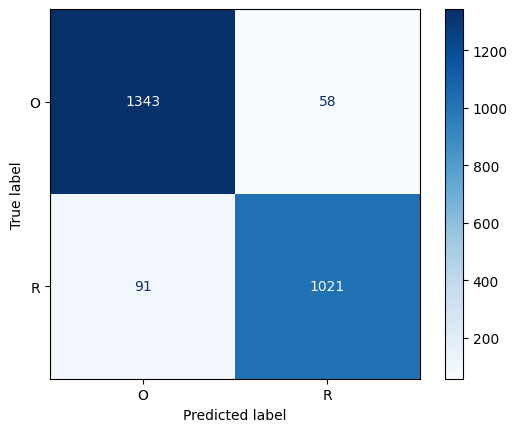

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_true, y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot(cmap='Blues');
plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/confusion_matrix.jpg')

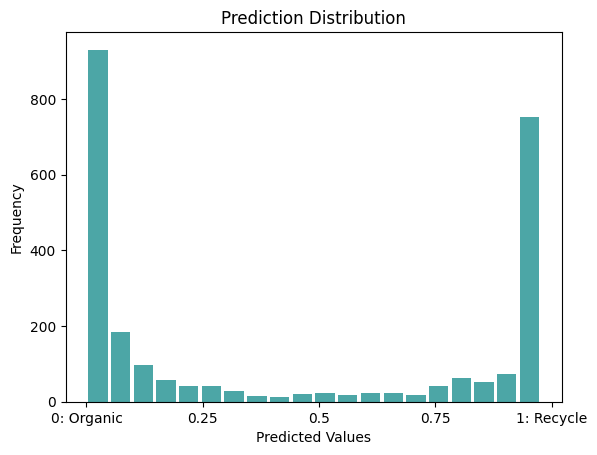

In [ ]:
# Histogram of the predictions

plt.hist(preds, bins=20, color='teal', alpha=0.7, rwidth=0.85)
plt.title('Prediction Distribution')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.xticks([0, 0.25, 0.5, 0.75, 1], ['0: Organic', '0.25', '0.5', '0.75', '1: Recycle'])
plt.show()

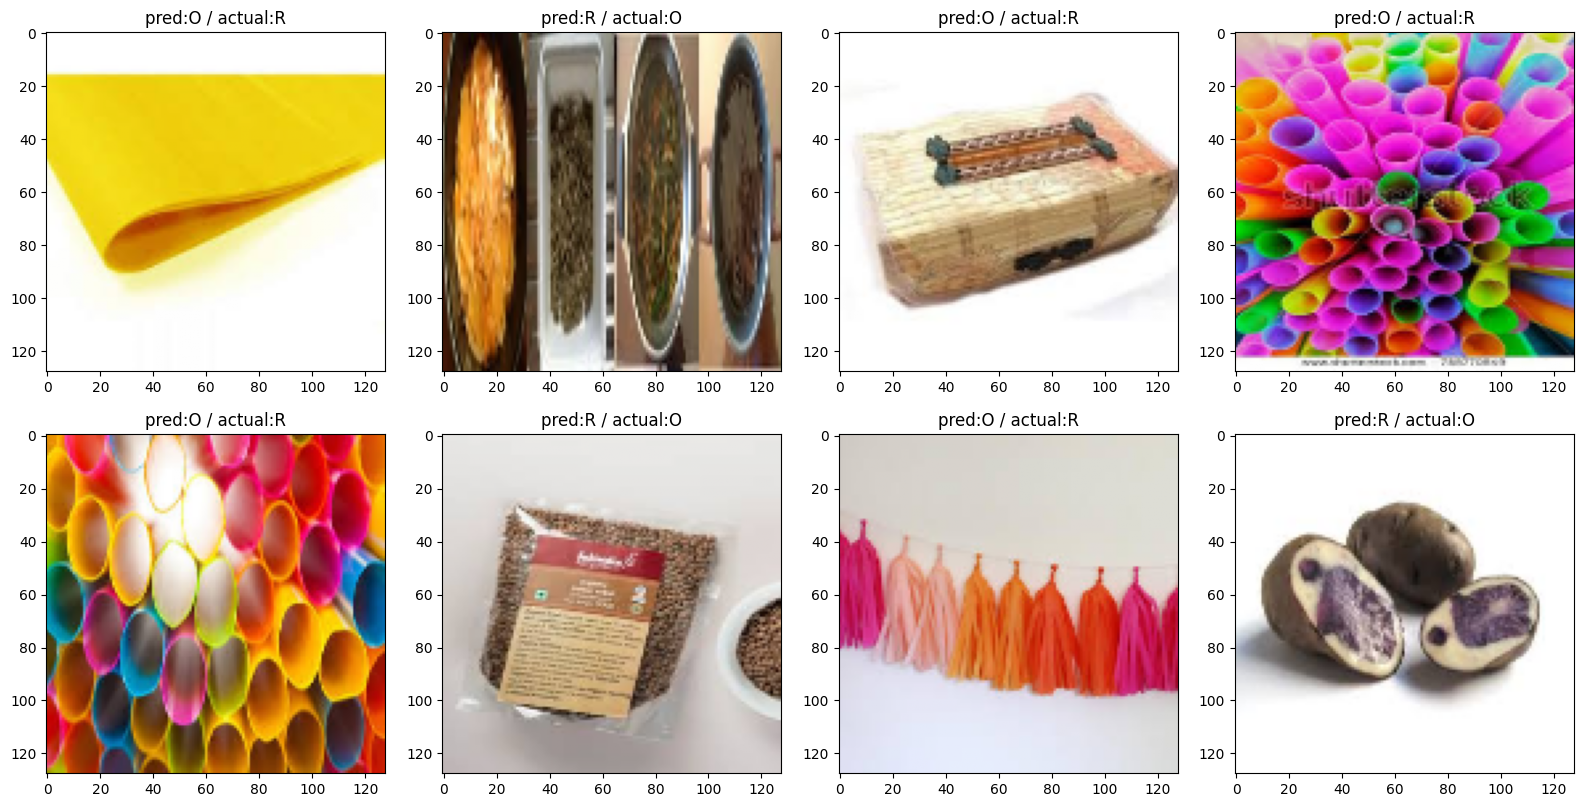

In [ ]:
# Looking specifically into misclassifications

### reference: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
miss_indices = np.where(y_true != y_preds)[0]

# Randomly select 25 misclassified indices
random_miss_indices = np.random.choice(miss_indices, 8, replace=False)

miss_data = test_data[random_miss_indices]
miss_true_labels = y_true[random_miss_indices]
miss_preds = y_preds[random_miss_indices]

# Visualize the 25 random misclassifications
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4,4, i + 1)
    plt.title('pred:{} / actual:{}'.format(class_names[miss_preds[i]], class_names[miss_true_labels[i]]))
    plt.imshow(miss_data[i])
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/miss_class1.jpg')
plt.show()


Plotted above are 8 randomly selected misclassified images. Some of these images are difficult to categorize, even for a human. This is a good indication that our model is probably performing at a near optimal level.

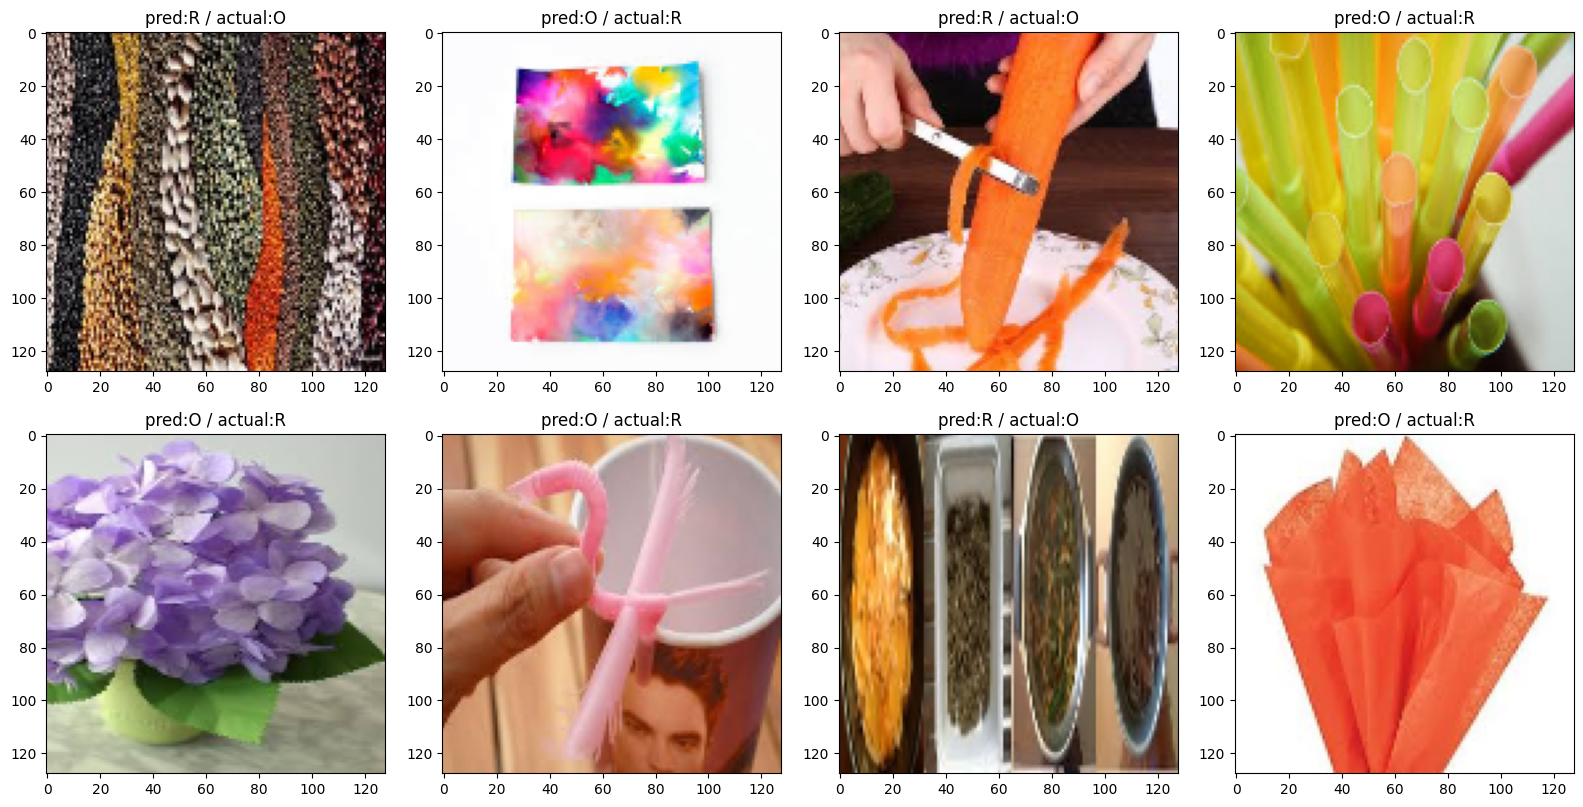

In [ ]:
### reference: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
miss_indices = np.where(y_true != y_preds)[0]

# Randomly select 25 misclassified indices
random_miss_indices = np.random.choice(miss_indices, 8, replace=False)

miss_data = test_data[random_miss_indices]
miss_true_labels = y_true[random_miss_indices]
miss_preds = y_preds[random_miss_indices]

# Visualize the 25 random misclassifications
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4,4, i + 1)
    plt.title('pred:{} / actual:{}'.format(class_names[miss_preds[i]], class_names[miss_true_labels[i]]))
    plt.imshow(miss_data[i])
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/miss_class.jpg')
plt.show()


More examples of missclassified images.




---
**Summary:**

Our goal was to build a model that outperformed the pre-trained model,  VGG16. After customizing the 'top' layers, we got an accuracy of approximately 90% for both the training and validation datasets.

By employing data augmentation, various regularization techniques, and adding more Convolutional and Dense layers, we achieved higher training and validation accuracy (0.9137) compared to the model that relies on VGG16.

Several of the misclassified images are challenging to categorize, even for humans. This suggests that the model is performing at or near an optimal level.


---
**Improvement opportunities:**

There is potential for improvement if we were not constrained by Colab's limitations, such as limited compute units, memory, and storage.

We could explore other pre-trained models, such as ResNet50, Inception, EfficientNet, etc.


Delve deeper into the misclassified images to discover trends and patterns. For instance, utilize interpretation techniques like LIME (Local Interpretable Model-Agnostic Explanations) to gain a better understanding of model predictions.

----------